In [13]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

    100% |████████████████████████████████| 286kB 2.6MB/s ta 0:00:01


In [221]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("../data/booking_train_set.csv", nrows=999999)

In [222]:
df

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
...,...,...,...,...,...,...,...,...,...,...
999994,999994,38375,2016-08-11,2016-08-12,31870,desktop,2436,Gondal,Fook Island,38375_1
999995,999995,3849877,2016-01-14,2016-01-17,48968,mobile,359,Tcherkistan,Cobra Island,3849877_1
999996,999996,3849877,2016-01-17,2016-01-19,23921,mobile,9452,Tcherkistan,Cobra Island,3849877_1
999997,999997,3849877,2016-01-19,2016-01-22,29319,mobile,359,Tcherkistan,Cobra Island,3849877_1


In [233]:
city_to_country

{5: 'Bandaria',
 6: 'Dawsbergen',
 7: 'Elbonia',
 8: 'Bozatta',
 11: 'Gondal',
 12: 'Cobra Island',
 13: 'Gondal',
 14: 'Grand Fenwick',
 15: 'Sylvania',
 16: 'Cobra Island',
 17: 'Bozatta',
 19: 'Gondal',
 22: 'Kumbolaland',
 23: 'Poictesme',
 25: 'Elbonia',
 27: 'Halla',
 28: 'Cobra Island',
 29: 'Santa Prisca',
 36: 'Gondal',
 39: 'Bozatta',
 40: 'Gondal',
 43: 'Fook Island',
 44: 'Sylvania',
 46: 'Fook Island',
 47: 'Fook Island',
 50: 'Saint Marie',
 52: 'Santa Prisca',
 53: 'Gondal',
 55: 'Cobra Island',
 57: 'Cobra Island',
 59: 'Bozatta',
 61: 'Glubbdubdrib',
 63: 'Sylvania',
 64: 'Cobra Island',
 66: 'Osterlich',
 67: 'Fook Island',
 69: 'Sokovia',
 71: 'Kumbolaland',
 72: 'Dawsbergen',
 74: 'Elbonia',
 76: 'Fook Island',
 77: 'Edonia',
 82: 'Gondal',
 83: 'Gondal',
 88: 'San Sombrèro',
 90: 'Santa Prisca',
 94: 'Fook Island',
 95: 'Axphain',
 96: 'Fook Island',
 97: 'Gondal',
 99: 'São Rico',
 101: 'Glubbdubdrib',
 103: 'Cobra Island',
 104: 'Fook Island',
 107: 'Russian Demo

In [3]:
from collections import Counter

def plot_count(data,  title="", counted=False):
    
    plt.style.use("seaborn")
    
    if not counted:
        counter = Counter(data)
    else:
        counter = data
    
    fig, ax = plt.subplots()
    size = 10
    most_common = counter.most_common(20)
    
    for i, l in enumerate(most_common):
        rects1 = ax.bar(size * i, l[1], size / 1.5, label=str(l[0]))
    
    labels = [most_common[i][0] for i in range(len(most_common))]
    ticks = [size * i for i in range(len(most_common))]
    ax.set_title(title)
    plt.xticks(ticks, labels, rotation="vertical", fontsize=10)

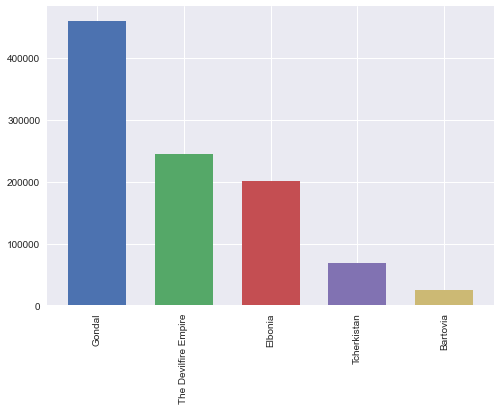

In [4]:
plot_count(df["booker_country"].values)

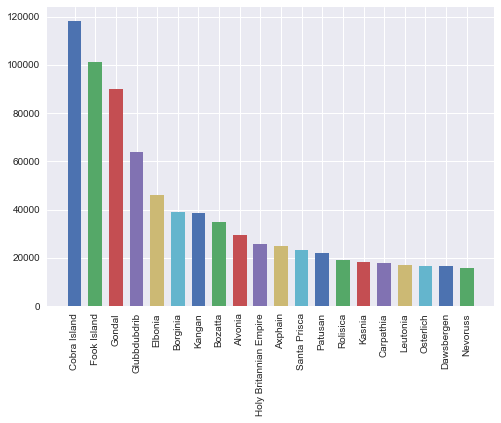

In [5]:
plot_count(df["hotel_country"].values)

In [6]:
df = pd.read_csv("../data/booking_train_set.csv", nrows=999999)
per_trip = df.groupby(df.utrip_id).\
    agg({"city_id": "unique", "user_id": "count", "hotel_country": "unique"})

per_trip

,city_id,user_id,hotel_country
utrip_id,,,
1000027_1,"[8183, 15626, 60902, 30628]",4,[Gondal]
1000045_1,"[64876, 55128, 9608, 31817, 36170, 58178, 36063]",7,"[Fook Island, Carpathia, Gondal]"
1000083_1,"[55990, 14705, 35160, 36063]",4,"[Osterlich, Gondal]"
100008_1,"[11306, 12096, 6761, 6779, 65690]",5,[Kamistan]
1000097_1,"[17127, 31088, 40521, 55128, 21033, 6306, 6788...",10,[Fook Island]
...,...,...,...
999735_1,"[36063, 43306, 11481, 15626]",5,"[Gondal, Carpathia]"
999776_1,"[17775, 66634]",4,[Novistrana]
999839_1,"[8335, 21328, 48968]",4,[Cobra Island]


In [7]:
df = pd.read_csv("../data/booking_train_set.csv", nrows=999999)
per_trip = df.groupby(df.utrip_id).\
    agg({"city_id": "unique", "user_id": "count", "hotel_country": "unique"})

per_trip["nb_countries"] = per_trip["hotel_country"].apply(len)
per_trip["nb_cities"] = per_trip["city_id"].apply(len)


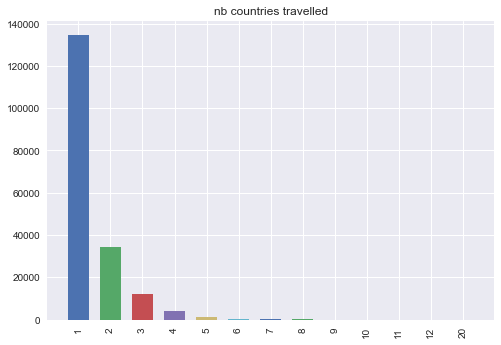

In [8]:
plot_count(per_trip["nb_countries"].values, "nb countries travelled")

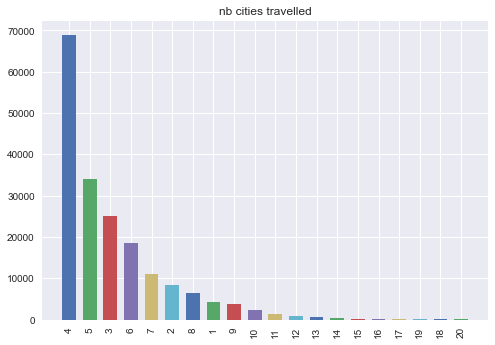

In [9]:
plot_count(per_trip["nb_cities"].values, "nb cities travelled")

In [30]:
# 2 - MF

In [212]:
co_cities = per_trip.city_id.values
co_cities

array([array([ 8183, 15626, 60902, 30628]),
       array([64876, 55128,  9608, 31817, 36170, 58178, 36063]),
       array([55990, 14705, 35160, 36063]), ...,
       array([ 8335, 21328, 48968]), array([51291, 66969, 67169, 24036]),
       array([17944, 47075,   228, 62930])], dtype=object)

In [20]:
list(rez)[:10]

[(8183, 15626),
 (8183, 60902),
 (8183, 30628),
 (15626, 60902),
 (15626, 30628),
 (60902, 30628),
 (64876, 55128),
 (64876, 9608),
 (64876, 31817),
 (64876, 36170)]

In [216]:
arr = np.array(list(rez))
arr

array([[ 8183, 15626],
       [ 8183, 60902],
       [ 8183, 30628],
       ...,
       [47075,   228],
       [47075, 62930],
       [  228, 62930]])

In [217]:
arr.shape

(2063461, 2)

In [25]:
!pip install torch
!pip install torchvision
!pip install pytorch_lightning
!pip install pytorch-lightning-bolts

    100% |████████████████████████████████| 12.8MB 142kB/s eta 0:00:01 8% |██▋                             | 1.0MB 4.0MB/s eta 0:00:03


In [3]:
dir(F)

['GRID_SAMPLE_INTERPOLATION_MODES',
 'GRID_SAMPLE_PADDING_MODES',
 'List',
 'Optional',
 'Tensor',
 'Tuple',
 '_Reduction',
 '_VF',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_adaptive_max_pool1d',
 '_adaptive_max_pool2d',
 '_adaptive_max_pool3d',
 '_add_docstr',
 '_fractional_max_pool2d',
 '_fractional_max_pool3d',
 '_get_softmax_dim',
 '_infer_size',
 '_list_with_default',
 '_max_pool1d',
 '_max_pool2d',
 '_max_pool3d',
 '_no_grad_embedding_renorm_',
 '_overload',
 '_pad',
 '_pad_circular',
 '_pair',
 '_single',
 '_threshold',
 '_triple',
 '_unpool_output_size',
 '_verify_batch_size',
 'adaptive_avg_pool1d',
 'adaptive_avg_pool2d',
 'adaptive_avg_pool3d',
 'adaptive_max_pool1d',
 'adaptive_max_pool1d_with_indices',
 'adaptive_max_pool2d',
 'adaptive_max_pool2d_with_indices',
 'adaptive_max_pool3d',
 'adaptive_max_pool3d_with_indices',
 'affine_grid',
 'alpha_dropout',
 'assert_int_or_pair',
 'avg_pool1d',
 'avg_

In [2]:
import os

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy
from pl_bolts.datasets import DummyDataset, RandomDataset

In [7]:
train = DummyDataset((1, 2), (1,))
train = DataLoader(train, batch_size=32)

In [291]:
class MatrixFactorization(pl.LightningModule):

    def __init__(self, n_items, lr=1e-3, embedding_size=10):
        super().__init__()
        self.lr = lr
        self.embeddings = nn.Embedding(n_items, embedding_size)
        self.sim = nn.CosineSimilarity(dim=1, eps=1e-6)
        
    def forward(self, x):
        u = self.embeddings(x[:, 0])
        v = self.embeddings(x[:, 1])
        x_hat = self.sim(u, v)
        return x_hat
    
    def weighted_cross_entropy(self, x, y, w, eps=1e-8):
        elmt_wise_loss = (y * torch.log(x + eps) + (1 - y) * torch.log(1 - x + eps))
        return -(w * elmt_wise_loss).sum() / w.sum()

    def training_step(self, batch, batch_idx):
        x, y = batch
        x_hat = 0.5 + 0.5 * self.forward(x)
        y_prime = torch.where(y > 0, torch.ones_like(y), torch.zeros_like(y))
        weights = torch.where(y > 0, y, torch.ones_like(y)).to(torch.float32)
        loss = self.weighted_cross_entropy(x_hat, y_prime, weights)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        # --------------------------
        # REPLACE WITH YOUR OWN
        x, y = batch
        x_hat = self.forward(x)
        y_prime = torch.where(y > 0, torch.ones_like(y), torch.zeros_like(y))
        loss = F.mse_loss(x_hat, y_prime)
        self.log('val_loss', loss)
        # --------------------------

    def test_step(self, batch, batch_idx):
        # --------------------------
        # REPLACE WITH YOUR OWN
        x, y = batch
        x_hat = self.forward(x)
        y_prime = torch.where(y > 0, torch.ones_like(y), torch.zeros_like(y))
        loss = F.mse_loss(x_hat, y_prime)
        self.log('test_loss', loss)
        # --------------------------

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.embeddings.parameters(), lr=self.lr, weight_decay=1e-5)
        return optimizer

In [281]:
mf_alg = MatrixFactorization(10, 5)

In [282]:
import numpy as np
mf_alg.forward(
    torch.LongTensor(np.array([[1, 2], [1, 3]]))
)

tensor([-0.4993,  0.3600], grad_fn=<DivBackward0>)

In [283]:
torch.log

<function _VariableFunctionsClass.log>

In [179]:
(e(torch.LongTensor([9, 8])) * (e(torch.LongTensor([8, 7])))).sum(dim=1)

tensor([-2.2579,  2.7706], grad_fn=<SumBackward1>)

In [180]:
list(e.parameters())[0].dtype

torch.float32

In [181]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
weight = torch.randint(5, (5,), dtype=torch.int64)
loss = F.cross_entropy(input, target, weight.to(torch.float32))

In [182]:
batch = (torch.LongTensor([[9, 8], [1, 8], [3, 4]]), torch.LongTensor([2, 3, 0]))

mf_alg.training_step(batch, 0)

torch.Size([3]) torch.Size([3]) torch.Size([3])
tensor([0.3055, 0.1158, 0.8452], grad_fn=<AddBackward0>) tensor([1, 1, 0]) tensor([2., 3., 1.])
tensor([-1.1858, -2.1558, -1.8657], grad_fn=<AddBackward0>)


tensor(-1.7841, grad_fn=<DivBackward0>)

In [284]:
from torch.utils.data import Dataset, TensorDataset

class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]

        if self.transform:
            x = self.transform(x)

        y = self.tensors[1][index]

        return x, y

    def __len__(self):
        return self.tensors[0].size(0)

class DummyRecoDs(CustomTensorDataset):
    
    def __init__(self, n_classes=10, n_samples=1000):
        X_train = torch.randint(n_classes, (n_samples, 2))
        y_train = torch.randint(n_classes, (n_samples, 1))
        super().__init__(tensors=(X_train, y_train))


In [264]:
ds = DummyRecoDs(100, 22000)

In [265]:
dl = DataLoader(ds, batch_size=32)

In [266]:
# init model
mf = MatrixFactorization(100)

# Initialize a trainer
trainer = pl.Trainer(max_epochs=3, progress_bar_refresh_rate=20)

# Train the model ⚡
trainer.fit(mf, dl)

GPU available: True, used: False
TPU available: None, using: 0 TPU cores

  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 1.0 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params


1

In [285]:
import itertools
import pandas as pd
from collections import Counter
from pytorch_lightning.loggers import TensorBoardLogger

class Dataset(torch.utils.data.Dataset):
    def __init__(self, a, b):
        assert len(a)==len(b)
        self.a = a
        self.b = b
        
    def __len__(self):
        return len(self.a)
        
    def __getitem__(self, i):
        return self.a[i], self.b[i]

class BookingTripRecoDataModule(pl.LightningDataModule):

    def __init__(self, data_dir: str, batch_size: int):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        """
        We use pandas to store the data 
        
        1 - We extract te positive pair of co-occurance of cities among user trips
        2 - Based on the pos pairs, we generate negative example with a neg to pos ratio = 5
        3 - We format this to Nx2 and Nx1 vectors
        """
        df = pd.read_csv(os.path.join(self.data_dir, "booking_train_set.csv"), nrows=999999)
        
        # Some indexes may be missing, we need to reindex
        self.nb_cities = len(set(df.city_id))
        self.index_to_cities = dict(enumerate(set(df.city_id)))
        self.cities_to_index = {v: k for k, v in self.index_to_cities.items()}
        
        # Additional infos
        country_per_city_tuples = dict(df.groupby(df.city_id).agg({"hotel_country": "unique"}).\
                    itertuples(index=True))
        self.city_to_country = dict(map(lambda p: (p[0], p[1][0]), country_per_city_tuples.items()))
        
        # Now we do a split of the training set based user_ids
        users = set(df.user_id.values)
        nb_users = len(users)
        train_nb_users =  int(0.9 * nb_users)
        print(f"Picking {train_nb_users} out of {nb_users}")
        train_users = np.random.choice(np.array(list(users)).flatten(), train_nb_users, replace=False)
        valid_users = users.difference(set(train_users))
        
        # Next we emit positive coocuring pairs
        def from_user_list_to_cooc_pairs(sub_df):
            per_trip = df.groupby(df.utrip_id).\
                agg({"city_id": "unique", "user_id": "count", "hotel_country": "unique"})

            per_trip["nb_countries"] = per_trip["hotel_country"].apply(len)
            per_trip["nb_cities"] = per_trip["city_id"].apply(len)

            def emit_pairs(cities):
                sorted_cities = sorted(map(lambda x: self.cities_to_index[x], cities))
                for i in range(len(cities)):
                    for j in range(i + 1, len(cities)):
                        yield (sorted_cities[i], sorted_cities[j])
            co_cities = per_trip["city_id"]
            return list(itertools.chain.from_iterable(map(emit_pairs, co_cities)))
        
        self.train_set_pairs = list(from_user_list_to_cooc_pairs(df[df.user_id.isin(train_users)]))
        self.valid_set_pairs = list(from_user_list_to_cooc_pairs(df[df.user_id.isin(valid_users)]))
    
    def build_neg_pairs(self, pos_pairs, n_classes, neg_rate=5):
        
        pair_counter = Counter(pos_pairs)
        pos_pairs_set = set(pos_pairs)
        total_pos_pairs = len(pos_pairs)
        
        print("Total pos pairs : ", total_pos_pairs)
        
        def sample_neg_pair():
            i = None
            j = None
            while i is None or j is None or (i, j) in pos_pairs_set or (j, i) in pos_pairs_set:
                i = np.random.randint(n_classes)
                j = np.random.randint(n_classes)
            return (i, j)
        
        neg_pairs = [sample_neg_pair() for _ in range(neg_rate * total_pos_pairs)]
        
        print("---> ", np.array(pos_pairs).shape, len(pos_pairs))
        
        xs, ys = zip(*pair_counter.items())
        
        X_pos = np.array(xs).reshape((-1, 2))
        Y_pos = np.array(ys)
        
        X_neg = np.array(neg_pairs).reshape((-1, 2))
        Y_neg = np.zeros((X_neg.shape[0]))
        
        X = np.concatenate([X_pos, X_neg], axis=0)
        Y = np.concatenate([Y_pos, Y_neg])
        print(X.shape, Y.shape)
        return X, Y
        
    def train_dataloader(self):
        print(self.train_set_pairs[:10])
        X, Y = self.build_neg_pairs(self.train_set_pairs, self.nb_cities)
        return DataLoader(Dataset(X, Y), batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        X, Y = self.build_neg_pairs(self.valid_set_pairs, self.nb_cities)
        return DataLoader(Dataset(X, Y), batch_size=self.batch_size, shuffle=True)
    
    def test_dataloader(self):
        return self.val_dataloader()

    

In [268]:
pos_pairs = [(1, 1)]
n_classes = 10

def sample_neg_pair():
    i = None
    j = None
    while i is None or j is None or (i, j) in pos_pairs or (j, i) in pos_pairs:
        i = np.random.randint(n_classes)
        j = np.random.randint(n_classes)
    return (i, j)

neg_pairs = np.array([sample_neg_pair() for _ in range(10)]).reshape((-1, 2))
neg_pairs.shape

(10, 2)

In [269]:
dataset = BookingTripRecoDataModule("/home/amor/Documents/code_dw/booking_challenge/data", 256)

In [270]:
dataset.setup()


Picking 155979 out of 173311


In [271]:
X, Y = dataset.build_neg_pairs(dataset.train_set_pairs, dataset.nb_cities)

Total pos pairs :  2063461
--->  (2063461, 2) 2063461
(10951088, 2) (10951088,)


In [324]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, a, b):
        assert len(a)==len(b)
        self.a = a
        self.b = b
        
    def __len__(self):
        return self.a.shape[0]
        
    def __getitem__(self, i):
        return self.a[i], self.b[i]

dl = DataLoader(Dataset(X, Y), batch_size=dataset.batch_size, shuffle=True)

In [334]:
# init model
mf = MatrixFactorization(dataset.nb_cities)

# define a tf logger 
logger = TensorBoardLogger("tb_logs", name="my_model")

# Initialize a trainer
trainer = pl.Trainer(gpus=1, max_epochs=3, progress_bar_refresh_rate=20, check_val_every_n_epoch=1, logger=logger)

# Train the model ⚡
#trainer.fit(mf, dl)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [335]:
#trainer.save_checkpoint("example.ckpt")
new_model = MatrixFactorization.load_from_checkpoint(checkpoint_path="example.ckpt", n_items=dataset.nb_cities, lr=1e-3)

In [336]:
from pytorch_lightning.callbacks import Callback

class EmbeddingLoggerCallBack(Callback):
    
    def __init__(self, country_list):
        self.country_list = country_list
        self.i = 0
    
    def on_epoch_end(self, trainer, pl_module):
        emb = list(pl_module.embeddings.parameters())[0]
        trainer.logger.experiment.add_embedding(emb, metadata=list(self.country_list), global_step=self.i)
        self.i += 1

In [337]:
new_trainer = pl.Trainer(gpus=1, max_epochs=20, progress_bar_refresh_rate=20, 
                         check_val_every_n_epoch=1, logger=logger, 
                         val_check_interval=0.25,
                         callbacks=[EmbeddingLoggerCallBack(list(dataset.city_to_country.values()))])
#new_trainer.test(new_model, dl)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [338]:
new_trainer.fit(mf, dl)


  | Name       | Type             | Params
------------------------------------------------
0 | embeddings | Embedding        | 380 K 
1 | sim        | CosineSimilarity | 0     
------------------------------------------------
380 K     Trainable params
0         Non-trainable params
380 K     Total params


1

In [339]:
new_trainer.test(mf, dl)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.1150, device='cuda:0')}
--------------------------------------------------------------------------------


[{'test_loss': 0.1149541363120079}]

In [248]:
emb = list(new_model.embeddings.parameters())[0]
emb.shape

torch.Size([38020, 10])

In [333]:
country_list = dataset.city_to_country.values()
print(len(set(country_list)))


193


In [255]:
country_list = list(dataset.city_to_country.values())
new_trainer.logger.experiment.add_embedding(emb, metadata=list(country_list), global_step=2)

In [244]:
import keyword
import torch
meta = []
while len(meta)<100:
    meta = meta+keyword.kwlist # get some strings
meta = meta[:100]

for i, v in enumerate(meta):
    meta[i] = v+str(i)

In [247]:
list(country_list)

['Bandaria',
 'Dawsbergen',
 'Elbonia',
 'Bozatta',
 'Gondal',
 'Cobra Island',
 'Gondal',
 'Grand Fenwick',
 'Sylvania',
 'Cobra Island',
 'Bozatta',
 'Gondal',
 'Kumbolaland',
 'Poictesme',
 'Elbonia',
 'Halla',
 'Cobra Island',
 'Santa Prisca',
 'Gondal',
 'Bozatta',
 'Gondal',
 'Fook Island',
 'Sylvania',
 'Fook Island',
 'Fook Island',
 'Saint Marie',
 'Santa Prisca',
 'Gondal',
 'Cobra Island',
 'Cobra Island',
 'Bozatta',
 'Glubbdubdrib',
 'Sylvania',
 'Cobra Island',
 'Osterlich',
 'Fook Island',
 'Sokovia',
 'Kumbolaland',
 'Dawsbergen',
 'Elbonia',
 'Fook Island',
 'Edonia',
 'Gondal',
 'Gondal',
 'San Sombrèro',
 'Santa Prisca',
 'Fook Island',
 'Axphain',
 'Fook Island',
 'Gondal',
 'São Rico',
 'Glubbdubdrib',
 'Cobra Island',
 'Fook Island',
 'Russian Democratic Union',
 'The Devilfire Empire',
 'Gondal',
 'Cobra Island',
 'Cobra Island',
 'Kasnia',
 'Santa Prisca',
 'Glubbdubdrib',
 'Gondal',
 'Bartovia',
 'Gondal',
 'Kasnia',
 'Gondal',
 'Gondal',
 'Kasnia',
 'Glubbdubd

In [427]:
l = [(1, 2), (4, 4)]
x, y = zip(*l)
x

(1, 4)

(1, 4)